# ***Resumen del Proyecto***

***Este proyecto busca utilizar modelos de predicción con el objetivo de obtener un determinado valor que relaciona diferentes tipos de datos climatológicos y definen si en una determinada fecha los valores de la capa de ozono (O3) se consideraban "Normales" o "Altos".***

***Se usarán dos datasets separados y se evaluarán utilizando diferentes modelos predictivos (Redes-Neuronales & Árboles de Decisión), puesto que son buenos modelos para resolver problemas de clasificación como al que nos enfrentamos con este conjunto de datos.***

## ***Fuente de Datos***

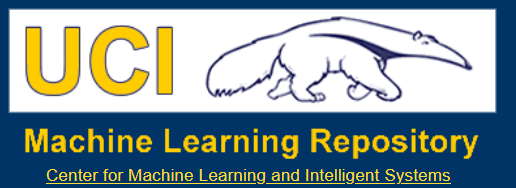

*Nuestra fuente para obtener los datos pertenece al repositorio de Machine Learning de la Universidad de California en Irving - UCI ML*

***URL - Ozone Level Detection:*** https://archive.ics.uci.edu/ml/datasets/ozone+level+detection

A su vez, las fuentes que han recopilado estos datos vienen de la mano de:


*   ***`Kun Zhang, Department of Computer Science, Xavier University of Lousiana`***
*   ***`Wei Fan, IBM T.J.Watson Research`***
*   ***`XiaoJing Yuan, Engineering Technology Department, College of Technology, University of Houston`*** 



## ***Información sobre los datos***

*Dos conjuntos de datos son los que extraeremos desde la fuente. Ambos reflejan dos niveles de la capa de Ozono para diversas fechas. Uno contiene datos para el pico cada 8 horas. El otro para el pico cada 1 hora.*

*Los datos fueron recogidos entre 1998 y 2004 en las áreas de Houston, Galveston y Brazoria en el estado de Texas en EEUU.*

### ***Terminología del Dataset***

*Para entender que significan las diferentes variables del dataset, nos referiremos a su forma de acotar sus términos:*

* #### ***T*** - Temperatura
* #### ***WS*** - Velocidad del Viento
* #### ***RH*** - Humedad Relativa
* ####  ***HPA*** - Hectopascales a cierta altura
        El hectopascal (hPa): Es una unidad de presión que equivale a 100 pascales. Es usado por su equivalencia con el milibar, medida común para expresar la presión atmosférica.

* ####  ***U*** (east-west) - Hace referencia al viento del Este al Oeste
* ####  ***V*** (north-south) - Hace referencia al viento del Norte al Sur
* ####  ***HT*** - Altitud Geopotencial
        Altitud Geo Potencial: Es la altura, referida al nivel del mar, de un punto en la atmósfera, expresada en unidades proporcionales al geopotencial en dicho punto, es decir, al trabajo necesario para llevar una masa unidad desde el nivel del mar hasta ese punto.

* ####  ***SLP*** - Niveles de Presión del Mar
* ####  ***SLP_*** - Cambio de valor en el nivel de presión del mar del día anterior
* ####  ***PREP*** - Precipitaciones
* ####  ***KI (K-Index)*** - Índice Geomagnético K
        El índice geomagnético K cuantifica las alteraciones en la componente horizontal del campo magnético terrestre mediante un número entero en el rango de 0 a 9.
* ####  ***TT (Total Totals)*** - Índice utilizado para evaluar la fuerza de las tormentas.
       El TT es una combinación de los totales verticales (VT) y los totales cruzados (CT). El VT es la diferencia de temperatura entre 850 y 500 mb, mientras que el CT es un punto de rocío de 850 mb menos la temperatura de 500 mb.

### ***Características del Dataset***

*Estas terminologías se utilizan a su vez en conjunto con otras indicaciones numéricas para darles valor y así obtener estas características.*

---
* ####  ***WS0~23*** - Velocidad del Viento para cada hora (0h a 23h)
* ####  ***WS_AV*** - Velocidad del Viento Media
* ####  ***WS_PK*** - Velocidad del Viento Máxima
----
* ####  ***T0~23*** - Temperatura para cada hora (0h a 23h)
* ####  ***T_AV*** - Temperatura Media
* ####  ***T_PK*** - Temperatura Máxima
----
* ####  ***T85, T70, T50*** - Temperatura a 85, 70 y 50 Hectopascales
* ####  ***RH85, RH70, RH50*** - Humedad Relativa a 85, 70 y 50 Hectopascales
* ####  ***U85, U70, U50*** - Viento(Este-Oeste) a 85, 70 y 50 Hectopascales
* ####  ***V85, V70, V50*** - Viento(Norte-Sur) a 85, 70 y 50 Hectopascales
* ####  ***HT85, HT70, HT50*** - Altura Geopotencial a 85, 70 y 50 Hectopascales

# ***Carga de los Datos***

Los datos los tomaremos del repositorio en Git-Hub que usaremos para guardar el progreso del trabajo.

Git: ***texto en negrita*** https://github.com/Marc-Haze/Data-Analysis/tree/main/Ozone_Level_Detection

In [1]:
import pandas as pd

# Fuente para obtener los conjuntos de datos
url_8h_data = 'https://raw.githubusercontent.com/Marc-Haze/Data-Analysis/main/Ozone_Level_Detection/data/eighthr.data'
url_1h_data = 'https://raw.githubusercontent.com/Marc-Haze/Data-Analysis/main/Ozone_Level_Detection/data/onehr.data'

# Las columnas no están especificadas en los .data así que las añadiremos a mano
columnas = ["Date","WSR0","WSR1","WSR2","WSR3","WSR4","WSR5","WSR6","WSR7","WSR8",
            "WSR9","WSR10","WSR11","WSR12","WSR13","WSR14","WSR15","WSR16","WSR17",
            "WSR18","WSR19","WSR20","WSR21","WSR22","WSR23","WSR_PK","WSR_AV","T0",
            "T1","T2","T3","T4","T5","T6","T7","T8","T9","T10","T11","T12","T13",
            "T14","T15","T16","T17","T18","T19","T20","T21","T22","T23","T_PK","T_AV",
            "T85","RH85","U85","V85","HT85","T70","RH70","U70","V70","HT70","T50","RH50",
            "U50","V50","HT50","KI","TT","SLP","SLP_","Precp","Target"]

# Leemos los datos con Pandas
data_8h = pd.read_csv(url_8h_data)
data_1h = pd.read_csv(url_1h_data)

# Añadimos las columnas
data_8h.columns = columnas
data_1h.columns = columnas

## ***Lectura de Datos para 8H***

In [2]:
data_8h.head()

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Target
0,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
1,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
2,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
3,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0
4,1/6/1998,3.1,3.5,3.3,2.5,1.6,1.7,1.6,1.6,2.3,...,0.09,11.98,11.28,5770,27.95,46.25,10120,?,5.84,0.0


In [3]:
data_8h.describe()

,Target
count,2533.000000
mean,0.063166
std,0.243310
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [4]:
data_8h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2533 non-null   object 
 1   WSR0    2533 non-null   object 
 2   WSR1    2533 non-null   object 
 3   WSR2    2533 non-null   object 
 4   WSR3    2533 non-null   object 
 5   WSR4    2533 non-null   object 
 6   WSR5    2533 non-null   object 
 7   WSR6    2533 non-null   object 
 8   WSR7    2533 non-null   object 
 9   WSR8    2533 non-null   object 
 10  WSR9    2533 non-null   object 
 11  WSR10   2533 non-null   object 
 12  WSR11   2533 non-null   object 
 13  WSR12   2533 non-null   object 
 14  WSR13   2533 non-null   object 
 15  WSR14   2533 non-null   object 
 16  WSR15   2533 non-null   object 
 17  WSR16   2533 non-null   object 
 18  WSR17   2533 non-null   object 
 19  WSR18   2533 non-null   object 
 20  WSR19   2533 non-null   object 
 21  WSR20   2533 non-null   object 
 22  

## ***Lectura de Datos para 1H***

In [5]:
data_1h.head()

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Target
0,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
1,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
2,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
3,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0
4,1/6/1998,3.1,3.5,3.3,2.5,1.6,1.7,1.6,1.6,2.3,...,0.09,11.98,11.28,5770,27.95,46.25,10120,?,5.84,0.0


In [6]:
data_1h.describe()

,Target
count,2535.000000
mean,0.028797
std,0.167268
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
data_1h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2535 non-null   object 
 1   WSR0    2535 non-null   object 
 2   WSR1    2535 non-null   object 
 3   WSR2    2535 non-null   object 
 4   WSR3    2535 non-null   object 
 5   WSR4    2535 non-null   object 
 6   WSR5    2535 non-null   object 
 7   WSR6    2535 non-null   object 
 8   WSR7    2535 non-null   object 
 9   WSR8    2535 non-null   object 
 10  WSR9    2535 non-null   object 
 11  WSR10   2535 non-null   object 
 12  WSR11   2535 non-null   object 
 13  WSR12   2535 non-null   object 
 14  WSR13   2535 non-null   object 
 15  WSR14   2535 non-null   object 
 16  WSR15   2535 non-null   object 
 17  WSR16   2535 non-null   object 
 18  WSR17   2535 non-null   object 
 19  WSR18   2535 non-null   object 
 20  WSR19   2535 non-null   object 
 21  WSR20   2535 non-null   object 
 22  

## Consideraciones

# ***Bibliografías & Web-Referencias***

*   ***Fuente de Datos:*** https://archive.ics.uci.edu/ml/datasets/ozone+level+detection
*   ***¿Qué es el valor TT(Total-Totals)?:*** https://www.theweatherprediction.com/habyhints/302/

*   ***¿Qué es el valor K-Index?:*** https://es.wikipedia.org/wiki/%C3%8Dndice_geomagn%C3%A9tico_K

*   ***Valores de K-Index:*** https://www.ign.es/web/gmt-indice-k
